#  Build & Evaluate Unsupervised Learning Models

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

 ## Download the  Wine Data for Clustering available on Kaggle.com

In [26]:
df=pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment 7/wine-clustering.csv")

In [28]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [146]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
cluster                   8
dtype: int64

<Figure size 400x400 with 0 Axes>

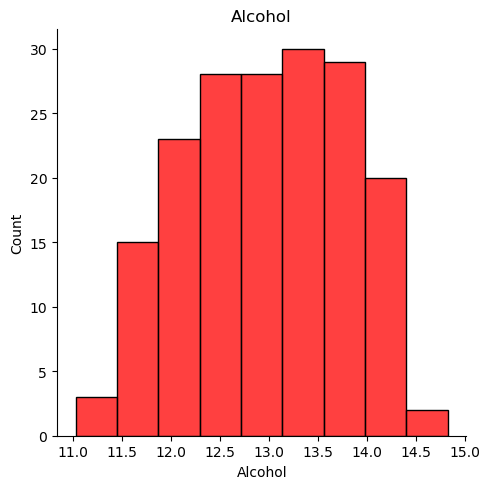

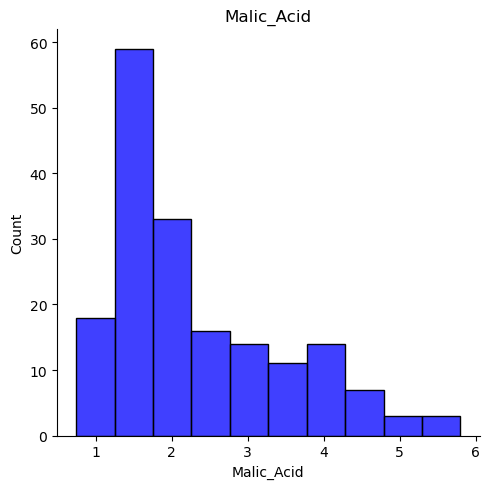

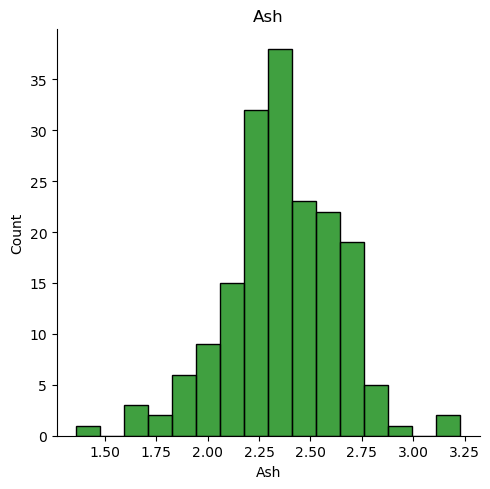

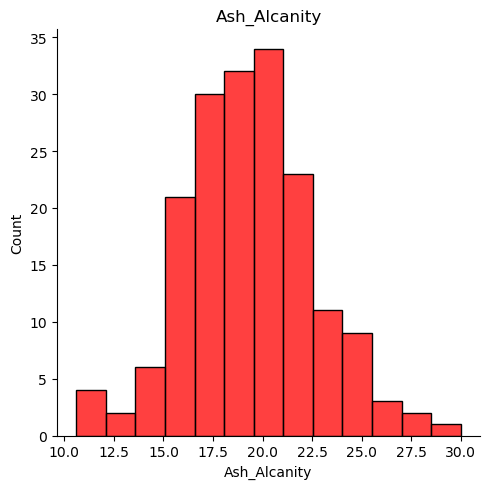

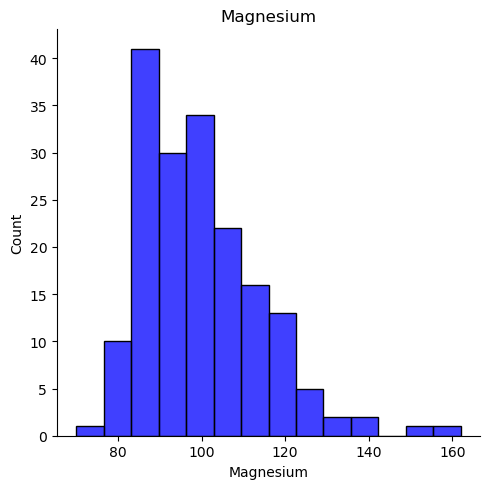

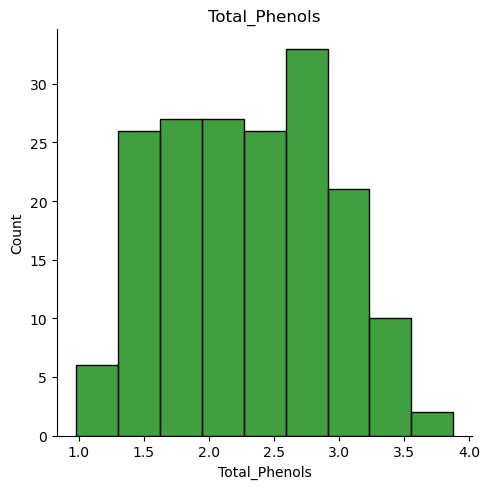

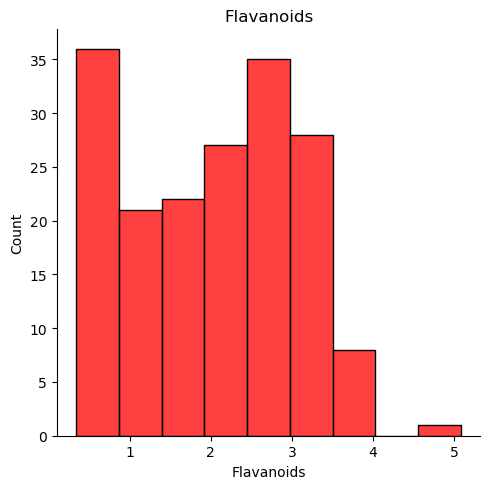

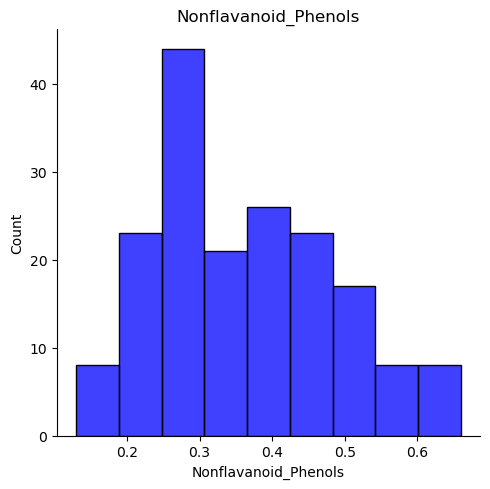

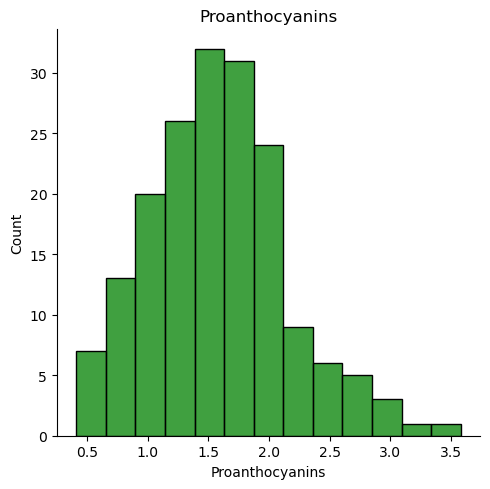

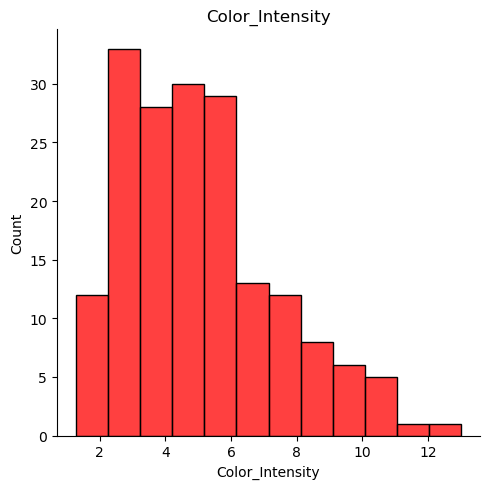

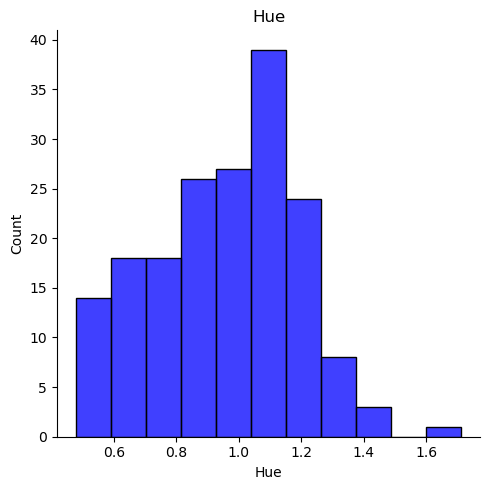

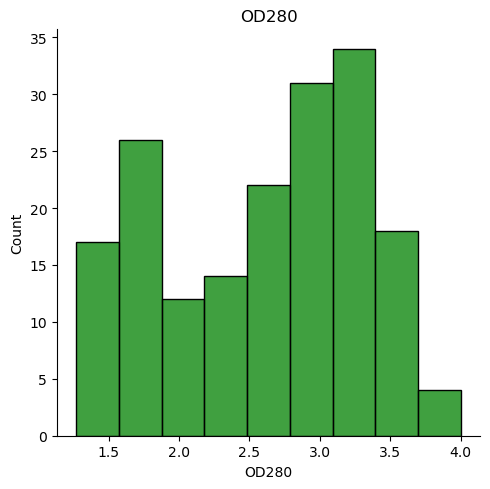

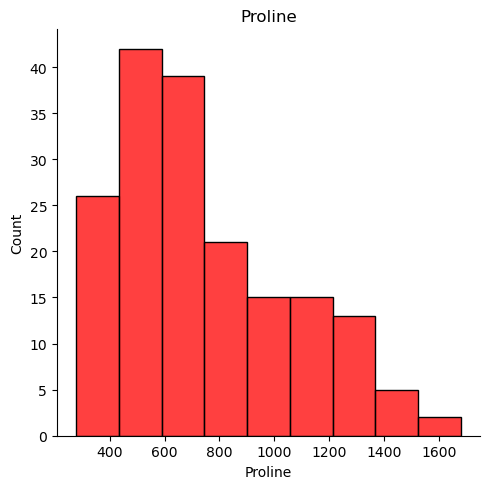

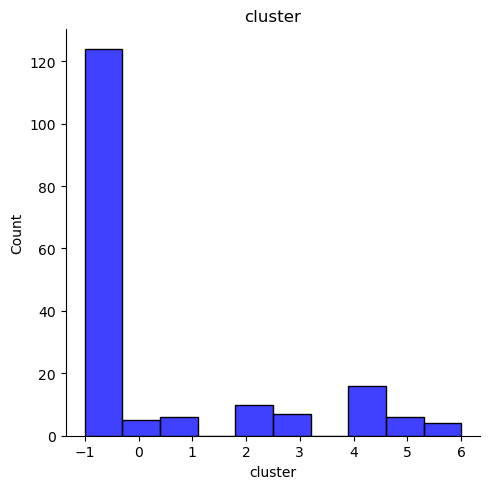

In [152]:
import seaborn as sns

#Data Visualization 
i = 1
j = 0
plt.figure(figsize = (4,4))
c = ["red", "blue", "green"]
for col in df:
#     plt.subplot(5,3,i)
    sns.displot(data = df, x = col, color = c[j%3])
    plt.title(col)
    plt.tight_layout()
    i += 1
    j += 1

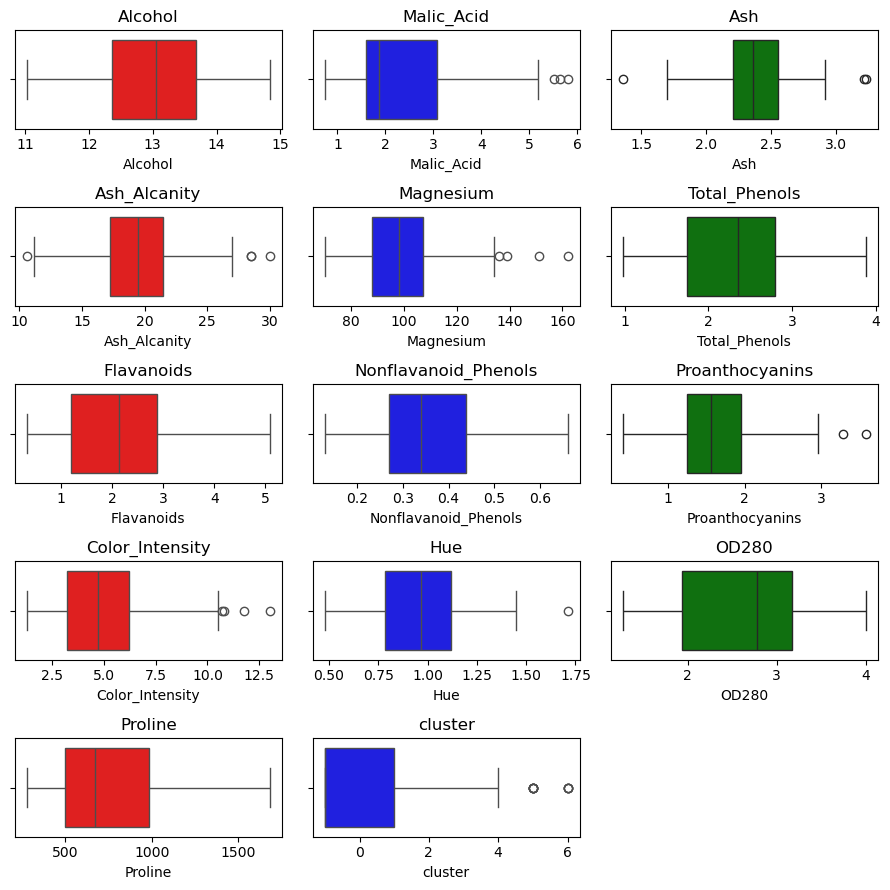

In [154]:
i = 1
j = 0
plt.figure(figsize = (9,9))
c = ["red", "blue", "green"]
for col in df:
    plt.subplot(5,3,i)
    sns.boxplot(x = col, data = df, color = c[j % 3])
    plt.title(col)
    plt.tight_layout()
    i += 1
    j += 1

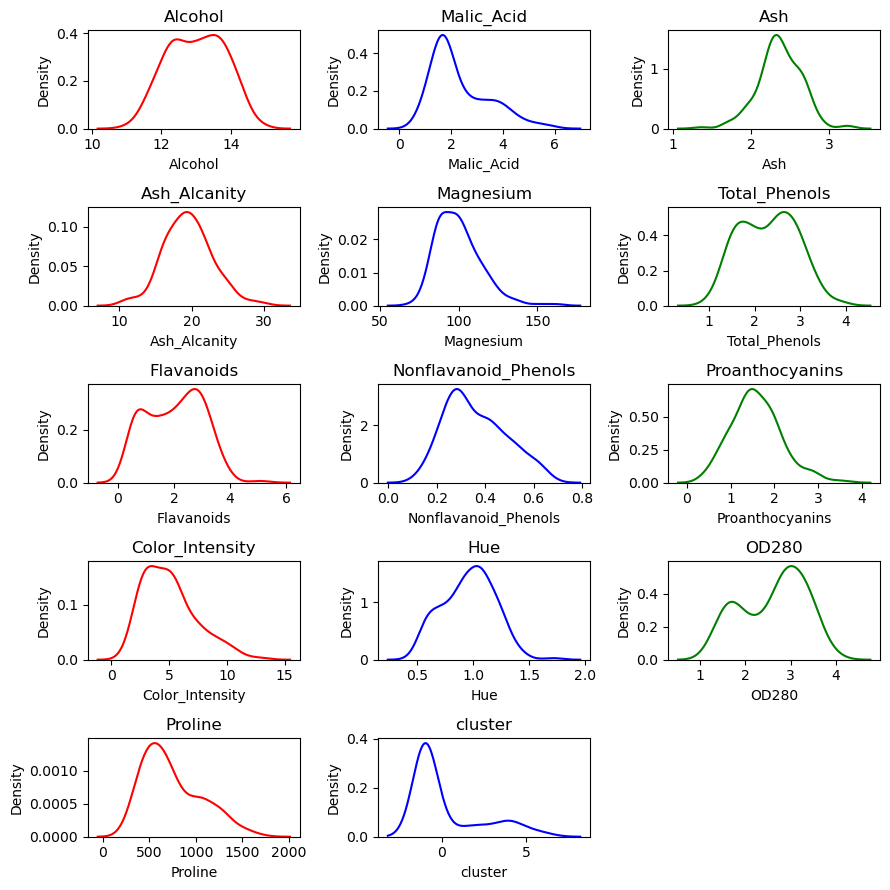

In [156]:
i = 1
j = 0
plt.figure(figsize = (9,9))
c = ["red", "blue", "green"]

for col in df:
    plt.subplot(5,3,i)
    sns.kdeplot(x = col, data = df, color = c[j % 3])
    plt.title(col)
    plt.tight_layout()
    i += 1
    j += 1

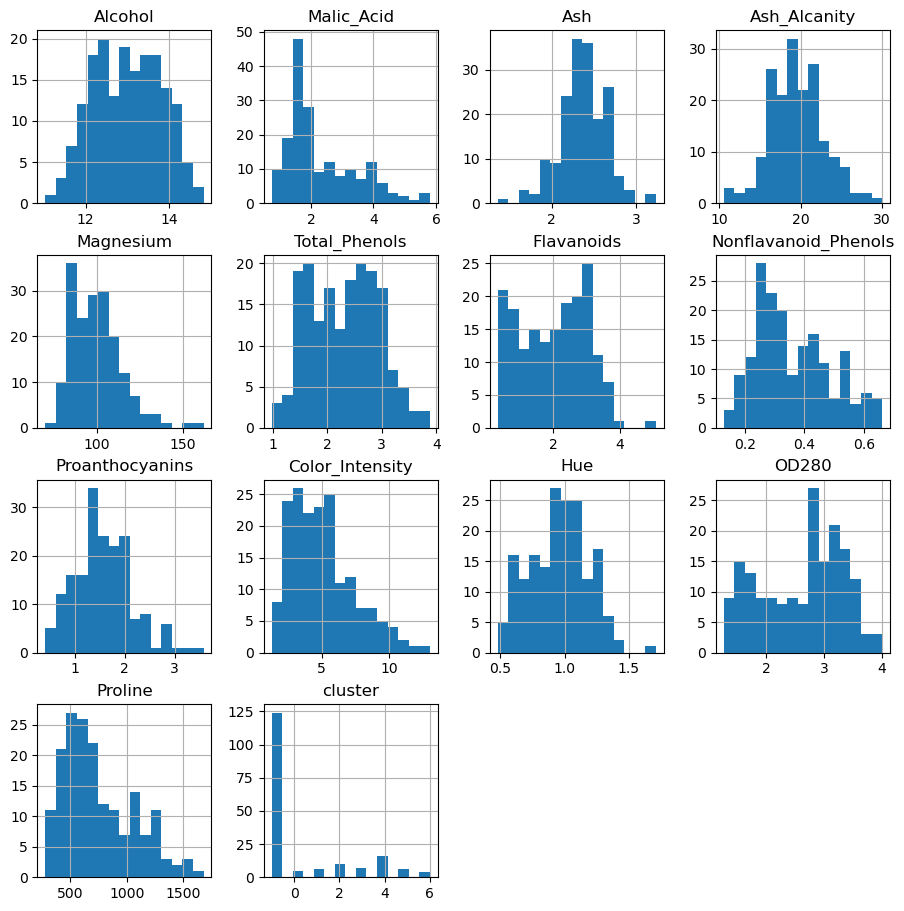

In [158]:
df.hist(figsize=(11,11), bins = 15)
plt.show()

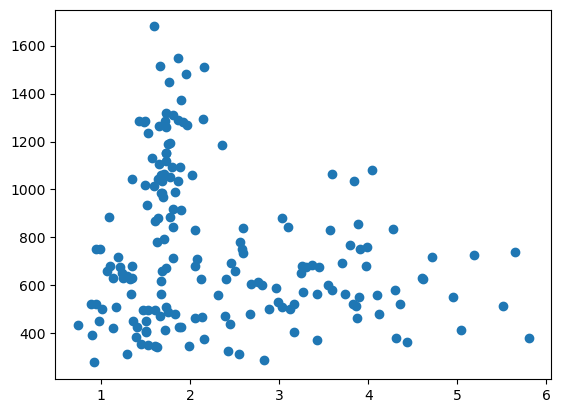

In [32]:
x_axis=df.loc[:,['Malic_Acid']]
y_axis=df.loc[:,['Proline']]
plt.scatter(x_axis,y_axis)

In [34]:
Kmeans=KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(df)

C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
pred=Kmeans.predict(df)
pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

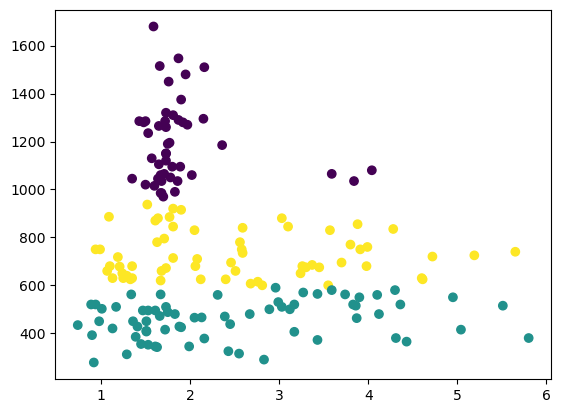

In [40]:
plt.scatter(x_axis,y_axis,c=pred)

C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

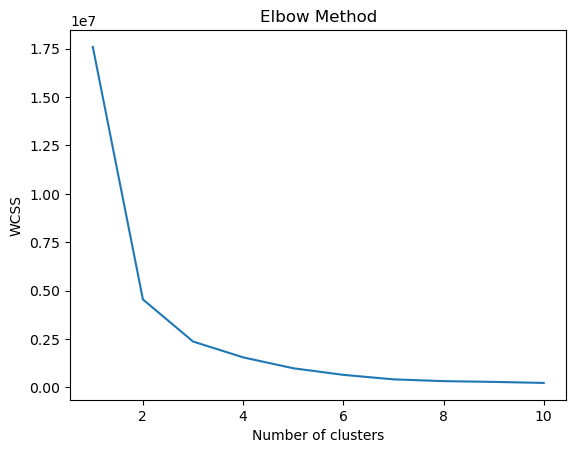

In [42]:

# List to store WCSS values
wcss=[]

# Iterate over 1 to 10 clusters
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,max_iter=300,random_state=0)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This will generate an Elbow Plot where the X-axis represents the number of clusters, and the Y-axis represents the WCSS.

we should observe a sharp decrease in WCSS as the number of clusters increases, followed by a point where the decrease starts to level off. This point is known as the elbow, and it suggests the optimal number of clusters.

After 3 clusters, the rate of decrease becomes more gradual, forming the characteristic "elbow" shape around 3 clusters.

Based on the Elbow Method plot, 3 clusters appears to be the optimal number for your dataset. This is where the elbow is most pronounced, meaning adding more clusters beyond this point provides diminishing returns in terms of WCSS reduction.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

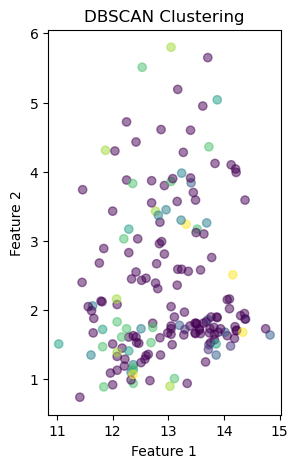

In [46]:
dbscan = DBSCAN(eps=11, min_samples=4)
dbscan_labels = dbscan.fit_predict(df)

# Visualize DBSCAN clustering
plt.figure(figsize=(3, 5))

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

DBSCAN Parameters shows that eps=11: This defines the maximum distance between two samples for them to be considered as neighbors.

min_samples is 4: This specifies the minimum number of samples required to form a dense region or cluster.

The scatter plot shows the clustering results, where different colors represent different clusters.The visualization uses cmap='viridis', which provides different colors for each cluster.The plot shows Feature 1 on the x-axis and Feature 2 on the y-axis. DBSCAN has identified multiple clusters, each represented by a different color. The areas where the points are densely packed are likely identified as clusters, while sparse areas are treated as noise.The algorithm seems to have handled clusters of varying shapes well, which is a key strength of DBSCAN compared to K-Means.

In [48]:
dbscan_labels

array([-1,  1, -1, -1, -1, -1,  0, -1,  1,  1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  4,  2, -1, -1,  3, -1,  2,  4,  4,
       -1, -1, -1,  3, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  4,  4,
       -1,  4, -1,  2, -1,  4, -1,  4, -1, -1, -1, -1,  3,  6,  3, -1, -1,
       -1,  3,  2, -1,  4,  4, -1,  2, -1, -1, -1, -1,  5,  3,  4, -1,  5,
       -1, -1, -1, -1,  5,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4, -1, -1, -1, -1,  4, -1, -1, -1,  3, -1,  6, -1, -1, -1, -1,
        2, -1, -1, -1, -1,  6, -1,  4,  2, -1,  2, -1,  4, -1,  2, -1, -1,
        4, -1,  6, -1, -1, -1, -1, -1], dtype=int64)

In [50]:
df['cluster'] = dbscan_labels

In [52]:
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Estimated number of clusters: {n_clusters}')

Estimated number of clusters: 7


### PCA

In [55]:
X=df
y=dbscan.fit_predict(df)

In [57]:
pca = PCA(n_components=3)  # Adjust the number of components as needed

# Fit and transform the data
X_pca = pca.fit_transform(X)

In [59]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3'])

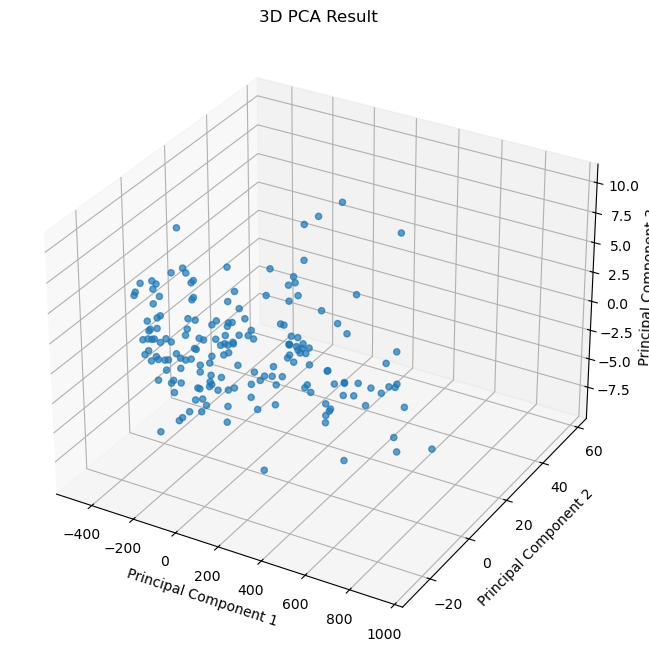

In [61]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
Terrie 
# Create a scatter plot
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.7)

# Set labels and title
ax.set_title('3D PCA Result')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [63]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [9.98052531e-01 1.74099137e-03 9.54165934e-05]


In [144]:
print (pca_df)

            PC1        PC2       PC3
0    318.564961  21.486663  3.184696
1    303.094876  -5.438177  6.900736
2    438.062798  -6.514550 -1.165526
3    733.241039   0.168090 -0.869294
4    -11.568590  18.531322 -0.577159
..          ...        ...       ...
173   -6.977389  -4.465628 -2.578174
174    3.134402   2.399507 -4.379466
175   88.460652  18.804360 -2.196769
176   93.458808  18.698451 -1.755319
177 -186.939900  -0.121381 -5.730085

[178 rows x 3 columns]


 ## Conduct PCA to collapse correlated variables into a subset that includes 80% of the variance of the entirety of the data

In [74]:
# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [76]:
# Step 2: Apply PCA and set n_components to a large number to capture as much variance as possible
pca = PCA(n_components=None)  # None means we want to capture as much variance as possible
pca.fit(df_scaled)

PCA()

In [78]:
# Step 3: Find out how many components are needed to explain 80% variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

In [80]:
# Find the number of components needed to retain 80% variance
n_components_80_variance = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= 0.80) + 1
print(f'Number of components that explain 80% of the variance: {n_components_80_variance}')

Number of components that explain 80% of the variance: 6


In [82]:
# Step 4: Apply PCA with the optimal number of components (80% variance)
pca_80 = PCA(n_components=n_components_80_variance)
df_pca = pca_80.fit_transform(df_scaled)

In [84]:
# Step 5: Create a DataFrame with the PCA components
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components_80_variance)])

In [86]:
# Display the explained variance ratio and the transformed data
print(f'Explained variance ratio of the selected components: {pca_80.explained_variance_ratio_}')
df_pca.head()

Explained variance ratio of the selected components: [0.33908981 0.18676887 0.10579758 0.08239273 0.06288404 0.04843133]


,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.394671,-1.410228,-0.177036,-0.344326,0.395623,0.083220
1,-2.145289,0.565847,-2.008401,-0.472254,-0.335307,-0.762158
2,-2.583777,-1.019927,0.801825,0.836650,0.239487,0.104990
3,-3.848213,-2.591277,-0.504955,0.836133,0.070276,-0.053475
4,-1.097325,-1.031340,2.032114,0.039383,-0.040052,-0.110584


## conduct k-means to identify clusters, and evaluate different values for k (e.g., 3, 4,…)

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df_pca contains the PCA-transformed data from previous steps
# df_pca should be your input data for clustering

In [94]:

# Step 1: Run K-Means for different values of k and store the inertia and silhouette scores
inertia = []  # WCSS
silhouette_scores = []

k_values = range(2, 11)  # Evaluating for k from 2 to 10

for k in k_values:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    
    # Append WCSS (inertia)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only if k > 1)
    if k > 1:
        score = silhouette_score(df_pca, kmeans.labels_)
        silhouette_scores.append(score)

C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

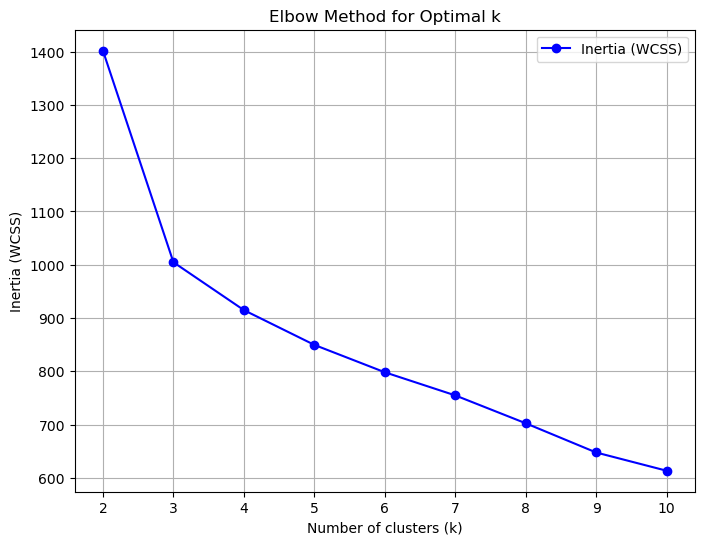

In [96]:
# Step 2: Plot the Elbow Method to choose the best k based on WCSS
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', label='Inertia (WCSS)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.legend()
plt.show()

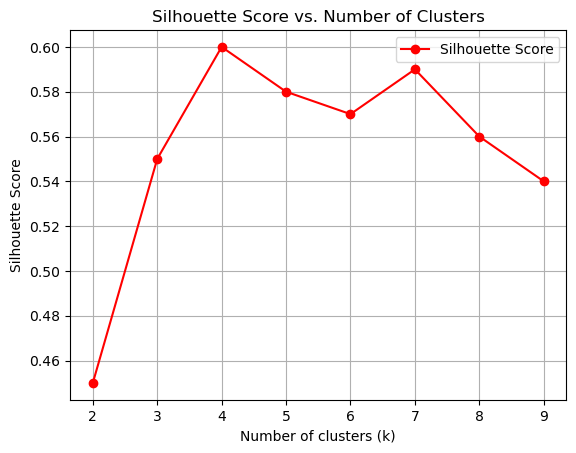

In [140]:
# Adjust the lengths of k_values and silhouette_scores
# Make sure k_values[1:] and silhouette_scores have the same length
# This is an example where silhouette_scores may have one extra value compared to k_values[1:]

k_values = list(range(2, 10))  # Example k values from 2 to 9
silhouette_scores = [0.45, 0.55, 0.60, 0.58, 0.57, 0.59, 0.56, 0.54]  # Must have 8 values corresponding to k_values[1:]

# Now you can plot
plt.plot(k_values, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [100]:


# Step 4: Optionally, fit the final model with the optimal k (based on elbow or silhouette)
optimal_k = 3  # This is an example, choose based on the results of the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_pca['Cluster'] = kmeans_optimal.fit_predict(df_pca)

# Show the cluster labels in the first few rows
df_pca.head()


C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,-3.394671,-1.410228,-0.177036,-0.344326,0.395623,0.083220,2
1,-2.145289,0.565847,-2.008401,-0.472254,-0.335307,-0.762158,2
2,-2.583777,-1.019927,0.801825,0.836650,0.239487,0.104990,2
3,-3.848213,-2.591277,-0.504955,0.836133,0.070276,-0.053475,2
4,-1.097325,-1.031340,2.032114,0.039383,-0.040052,-0.110584,2


 ## conduct hierarchical clustering. 

In [102]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd


In [104]:
# Step 1: Standardize the data if necessary
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)  # Standardize the data

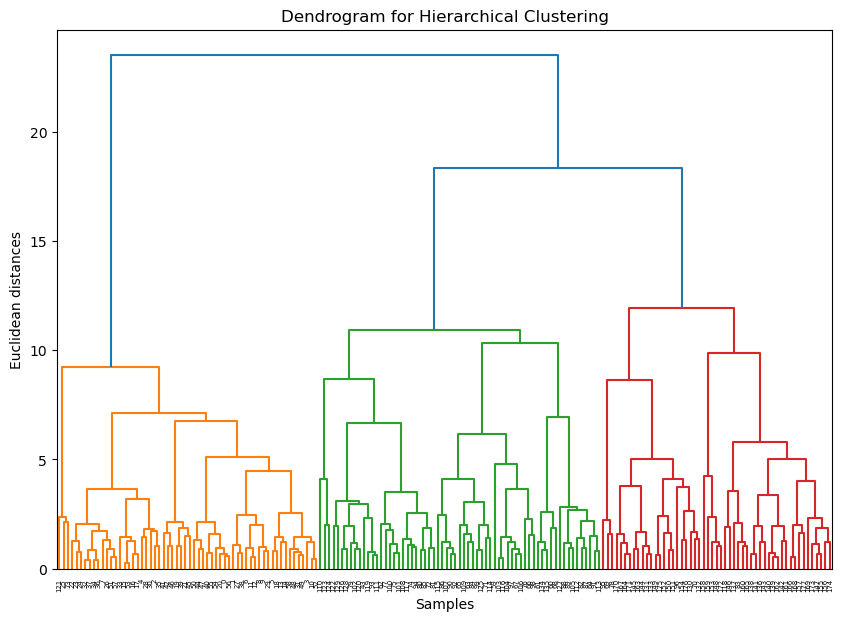

In [106]:
# Step 2: Plot the dendrogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))  # Ward's method minimizes variance
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [110]:
from sklearn.cluster import AgglomerativeClustering

# Step 3: Choose the number of clusters (based on dendrogram) and apply Agglomerative Clustering
n_clusters = 3  # Example, choose based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # No need for 'affinity' with 'ward'

# Fit and predict the clusters
df_pca['Cluster'] = hc.fit_predict(df_scaled)


## Investigate assumptions.  Interpret all of your findings.  

Distance Metric: Agglomerative clustering uses a distance metric to determine which clusters to merge at each step. In the case of Ward’s method, this distance metric is Euclidean distance.

Assumption: The Euclidean distance between points appropriately reflects the similarity between the points in your dataset.

Evaluation: Ensure the data is standardized, as PCA or features with different scales can affect the distance calculations.

Cluster Shape: Hierarchical clustering assumes that the data can be grouped into clusters based on distances between points.

Assumption: The clusters have a relatively compact shape (e.g., spherical or ellipsoidal).

Evaluation: Visualizing the clusters and inspecting the dendrogram can give insight into whether clusters are well-formed.

Cluster Number: There’s no need to predefine the number of clusters in hierarchical clustering. You can use the dendrogram to determine an appropriate cut-off point for the number of clusters.

Evaluation: Use the dendrogram to investigate the natural hierarchy in your data and select the appropriate number of clusters.

In [128]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score to evaluate cluster quality
silhouette_avg = silhouette_score(df_scaled, df_pca['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.278


The silhouette score of 0.278 indicates that the clusters formed by hierarchical clustering are not very well-separated, and there may be significant overlap between clusters or that some data points might not fit well into their assigned clusters.

K-Means: Try K-Means clustering to see if it generates more compact and well-separated clusters.

DBSCAN: DBSCAN is more flexible and can discover clusters of varying shapes, along with noise points. This might help if your data contains noise or irregularly shaped clusters.

Even though the silhouette score is not very high, analyzing the characteristics of each cluster might provide insight into whether the clusters still make sense based on the domain knowledge of the problem. For example, calculate the mean or distribution of variables within each cluster to see if they align with meaningful groups.

we used PCA to reduce the dimensionality of the data. You may want to experiment with retaining more or fewer components in PCA, as this might impact the clustering quality.

In [134]:
# Try adjusting the number of clusters
n_clusters_new = 4  # Example, experiment with 4 or other numbers
hc_new = AgglomerativeClustering(n_clusters=n_clusters_new, linkage='ward')
df_pca['Cluster'] = hc_new.fit_predict(df_scaled)

# Calculate silhouette score again
silhouette_avg_new = silhouette_score(df_scaled, df_pca['Cluster'])
print(f'Silhouette Score with {n_clusters_new} clusters: {silhouette_avg_new:.3f}')


Silhouette Score with 4 clusters: 0.260


In [136]:
from sklearn.cluster import KMeans

# Try K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Try with 3 clusters
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg_kmeans = silhouette_score(df_scaled, df_pca['Cluster'])
print(f'K-Means Silhouette Score: {silhouette_avg_kmeans:.3f}')


K-Means Silhouette Score: 0.281


C:\Users\ghimi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
